In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm, pareto

## Task 1: Simulate values for given distributions

### Exponential

In [99]:
def simulate_exponential(n, lam):
    U = np.random.uniform(size=n)
    X = -np.log(U) / lam
    return X

In [100]:
# 10 000 samples w rate 2
samples_exp = simulate_exponential(10000, lam=2)

Histogram of samples against analytical results

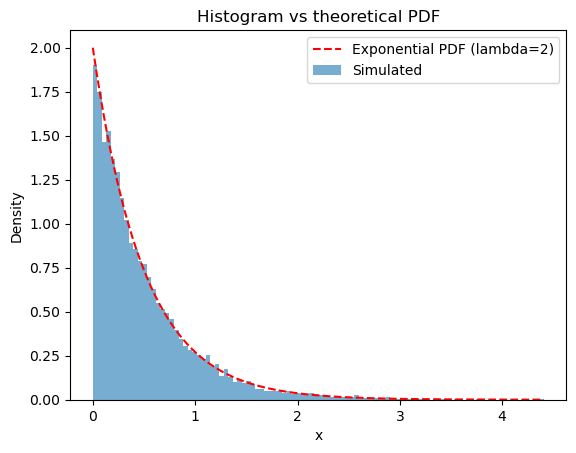

In [101]:
# plot histogram
plt.hist(samples_exp, bins=100, density=True, alpha=0.6, label='Simulated')
# overlay theoretical PDF
x = np.linspace(0, np.max(samples_exp), 500)
pdf = 2 * np.exp(-2 * x) 
plt.plot(x, pdf, 'r--', label='Exponential PDF (lambda=2)')
plt.title('Histogram vs theoretical PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


Kolmogorov–Smirnov test (should check if we have to implement ourselves or if we can use built in?)

In [102]:
# test against the exponential distribution with scale = 1/lambda
D_stat, p_value = kstest(samples_exp, 'expon', args=(0, 1/2))

print(f"K-S test statistic: {D_stat:.4f}")
print(f"P-value: {p_value:.4f}")

K-S test statistic: 0.0088
P-value: 0.4124


### Normal

In [103]:
def simulate_normal_box_muller(n, mu=0, sigma=1):
    U1 = np.random.uniform(size=n//2)
    U2 = np.random.uniform(size=n//2)

    R = np.sqrt(-2 * np.log(U1))
    theta = 2 * np.pi * U2

    Z1 = R * np.cos(theta)
    Z2 = R * np.sin(theta)

    Z = np.concatenate([Z1, Z2])
    return Z 

In [104]:
samples_normal = simulate_normal_box_muller(10000)

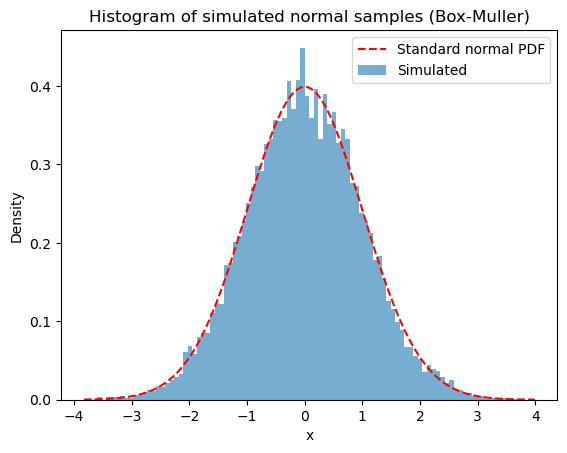

In [105]:
plt.hist(samples_normal, bins=100, density=True, alpha=0.6, label="Simulated")
x = np.linspace(min(samples_normal), max(samples_normal), 500)
pdf = norm.pdf(x)  # Standard normal
plt.plot(x, pdf, 'r--', label='Standard normal PDF')
plt.title("Histogram of simulated normal samples (Box-Muller)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

Kolmogorov–Smirnov test

In [106]:
D_stat, p_value = kstest(samples_normal, 'norm') 
print(f"K-S test statistic: {D_stat:.4f}")
print(f"P-value: {p_value:.4f}")

K-S test statistic: 0.0052
P-value: 0.9475


### Pareto

In [107]:
def simulate_pareto(n, beta=1, k=2.5):
    U = np.random.uniform(size=n)
    X = beta * (1 / U)**(1 / k)
    return X

In [ ]:
# parameters
n = 10000
beta = 1
k_values = [2.05, 2.5, 3, 4]

samples_dict = {}
for k in k_values:
    samples_dict[k] = simulate_pareto(n, beta=beta, k=k)

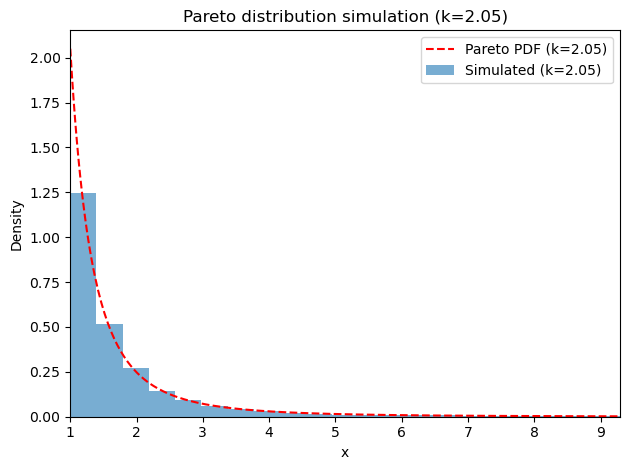

Kolmogorov-Smirnov test for k = 2.05
  K-S statistic: 0.0058
  P-value:       0.8862



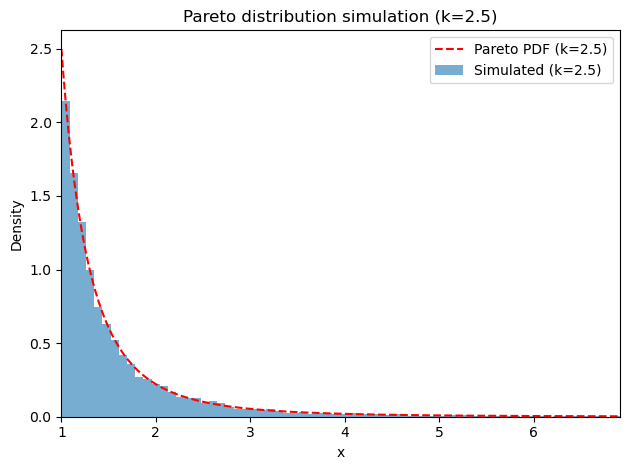

Kolmogorov-Smirnov test for k = 2.5
  K-S statistic: 0.0079
  P-value:       0.5584



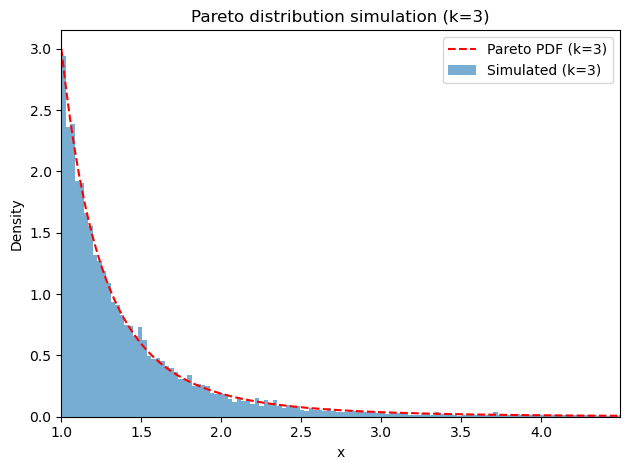

Kolmogorov-Smirnov test for k = 3
  K-S statistic: 0.0077
  P-value:       0.5868



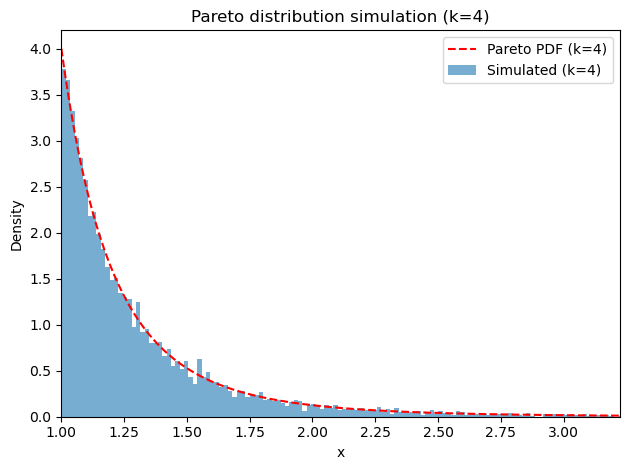

Kolmogorov-Smirnov test for k = 4
  K-S statistic: 0.0066
  P-value:       0.7717



In [ ]:
for k in k_values:
    samples = samples_dict[k]
    plt.hist(samples, bins=500, density=True, alpha=0.6, label=f"Simulated (k={k})")
    
    # theoretical PDF
    x = np.linspace(beta, np.percentile(samples, 99.5), 500)
    pdf = pareto.pdf(x, b=k, scale=beta)  # scipys pareto uses shape=b and scale=beta
    plt.plot(x, pdf, 'r--', label=f"Pareto PDF (k={k})")    
    plt.title(f"Pareto distribution simulation (k={k})")
    plt.xlabel("x")
    plt.xlim(left=1, right=np.percentile(samples, 99))
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Kolmogorov–Smirnov test
    D_stat, p_value = kstest(samples, 'pareto', args=(k, 0, beta))
    print(f"Kolmogorov-Smirnov test for k = {k}")
    print(f"  K-S statistic: {D_stat:.4f}")
    print(f"  P-value:       {p_value:.4f}\n")

## Task 2: Comparison of analytical and empirical mean of Pareto

In [190]:
results = []

for k in k_values:
    samples = samples_dict[k]   
    empirical_mean = np.mean(samples)
    empirical_var = np.var(samples)
    
    # theoretical values
    analytical_mean = beta * k / (k - 1) if k > 1 else np.inf
    analytical_var = (beta**2 * k) / ((k - 1)**2 * (k - 2)) if k > 2 else np.inf
    
    results.append({
        "k": k,
        "Empirical mean": empirical_mean,
        "Analytical mean": analytical_mean,
        "Empirical var": empirical_var,
        "Analytical var": analytical_var
    })

print(f"{'k':<6}{'Empirical mean':<20}{'Analytical mean':<20}{'Empirical var':<20}{'Analytical var':<20}")
for res in results:
    print(f"{res['k']:<6.2f}{res['Empirical mean']:<20.4f}{res['Analytical mean']:<20.4f}{res['Empirical var']:<20.4f}{res['Analytical var']:<20.4f}")


k     Empirical mean      Analytical mean     Empirical var       Analytical var      
2.05  1.9820              1.9524              13.7262             37.1882             
2.50  1.6948              1.6667              2.4003              2.2222              
3.00  1.4862              1.5000              0.5251              0.7500              
4.00  1.3362              1.3333              0.2287              0.2222              


## Task 3: Normal 95% confidence interval

## Task 4: Pareto distribution w Composition

In [ ]:
def simulate_pareto_composition_mu(n, mu=1):
    # simulate Y \sim Exponential(mu)
    U_Y = np.random.uniform(size=n)
    Y = -np.log(U_Y) / mu
    
    # simulate X | Y \sim Exponential(rate=Y)
    U_X = np.random.uniform(size=n)
    X = -np.log(U_X) / Y  
    
    return X

In [ ]:
n = 10000 
mu = 1

samples = simulate_pareto_composition_mu(n, mu)

print("Sample mean:", samples.mean())
print("Sample max:", samples.max())
print("Sample min:", samples.min())
print("Median:", np.median(samples))

Sample mean: 10.962299023903528
Sample max: 17664.260814235302
Sample min: 1.3368904215357955e-05
Median: 0.9903053504957674


k = 1, so mean and variance is inf